In [1]:
import tensorflow as tf

In [2]:
c = tf.constant([-1.0,1.0])

In [3]:
v = tf.Variable([1.0, 2.0])

In [4]:
v

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [5]:
v.numpy()

array([1., 2.], dtype=float32)

# Simple Optimization

In [6]:
opt = tf.optimizers.SGD()

In [7]:
with tf.GradientTape() as tape:
    y = tf.tensordot(c,v,1) -1

In [8]:
tape.gradient(y,v)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-1.,  1.], dtype=float32)>

In [9]:
loss = lambda : tf.tensordot(c,v,1)**2 -1

In [10]:
opt.minimize(loss, [v])

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [11]:
v = tf.Variable([1.0, 2.0])
var_vals, loss_vals = [], []
for _ in range(100):
    opt.minimize(loss, [v])
    var_vals.append(v.numpy())
    loss_vals.append(loss())

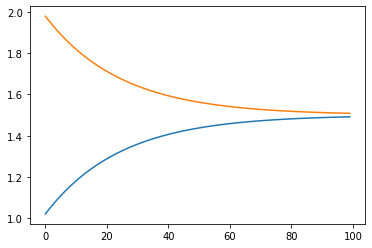

In [12]:
import matplotlib.pyplot as plt
plt.plot(var_vals)

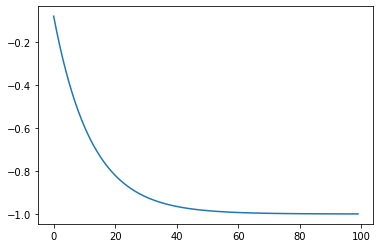

In [13]:
plt.plot(loss_vals)

# Optimising an integral function
# $\max_a \int_\Omega dP(\omega) f_\omega(a)$
# We can calculate the gradient as follows:
# $\nabla_a \int_\Omega dP(\omega) f_\omega(a) = \int_\Omega dP(\omega) \nabla_a f_\omega(a)$
# This is actually identical to the expected gradient:
# $\int_\Omega dP(\omega) [\nabla_a f_\omega(a)] = E_{\omega \sim P} [\nabla_a f_\omega(a)]$
# Consequently,
# $E_{\omega \sim P} [\nabla_a f_\omega(a)]  \approx \frac{1}{K} \sum_{k=1}^K [\nabla_a f_{\omega^k}(a)]$ with $\omega^k \sim P$. 
# In addition
# $E_{\omega \sim P} [\nabla_a f_\omega(a)] = E_{\omega^{k} \sim P} \{ \frac{1}{K} \sum_{k=1}^K [\nabla_a f_{\omega^k}(a)] \}$. 

In [14]:
import tensorflow_probability as tfp
tfd = tfp.distributions
dist = tfd.Beta(2,2)


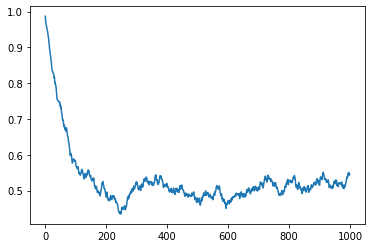

In [54]:
import numpy as np
v=tf.Variable(1.0)
n_samples=1000
omega = dist.sample([n_samples])  # Shape [4, 5, 3]
loss = lambda : (sample - v)**2
n_iter=int (1000 / n_samples)
value = np.zeros(n_steps)
n_steps = n_iter * n_samples
value = np.zeros(n_steps)

# Hand implementation of SGD
t=0
for _ in range(n_iter):
    for i in range(n_samples):
        sample = tf.Variable(omega[i])
        step_count = opt.minimize(loss, [v]).numpy()
        value[t] = v.numpy()
        t+=1

# Plot result
import matplotlib.pyplot as plt
plt.plot(value)

In [38]:
value

array([0.49909645])

In [ ]:
?opt